## Observations and Insights 

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined=pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
combined.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [13]:
# Checking the number of mice.
number_mice=len(combined["Mouse ID"].unique())
number_mice

249

In [16]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=combined[combined["Mouse ID"]!=duplicated_mouseID]
clean_df


In [6]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [38]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
#for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_group=combined.groupby(['Drug Regimen'])

mean_vol=drug_group['Tumor Volume (mm3)'].mean()
med_vol=drug_group['Tumor Volume (mm3)'].median()
var_vol=drug_group['Tumor Volume (mm3)'].var()
std_vol=drug_group['Tumor Volume (mm3)'].std()
sem_vol=drug_group['Tumor Volume (mm3)'].sem()

volume_table = pd.DataFrame({
    "Mean Volume": mean_vol,
    "Median Volume": med_vol,
    "Variance": var_vol,
    "Standard Deviation": std_vol,
    "SEM": sem_vol,
   
})
volume_table

,Mean Volume,Median Volume,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [54]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#need to isolate tumor volume
# Using the aggregation method, produce the same summary statistics in a single line
agg_vol=drug_group.agg(['mean', 'median', 'var', 'std', 'sem'])
agg_vol

Age_months                                       Weight (g)  \
                   mean median        var       std       sem       mean   
Drug Regimen                                                               
Capomulin     13.456522   16.5  59.620372  7.721423  0.509136  19.965217   
Ceftamin      13.247191   12.0  65.147591  8.071406  0.604977  27.398876   
Infubinol     16.230337   20.0  56.404272  7.510278  0.562919  27.196629   
Ketapril      15.659574   18.0  36.236432  6.019670  0.439030  27.861702   
Naftisol      12.000000    9.0  45.102703  6.715855  0.492430  27.166667   
Placebo       10.734807   10.0  40.384837  6.354907  0.472356  27.928177   
Propriva      10.894410    8.0  53.357531  7.304624  0.575685  27.043478   
Ramicane      10.684211    9.0  35.362393  5.946629  0.393825  19.679825   
Stelasyn      12.784530   14.0  63.036648  7.939562  0.590143  27.856354   
Zoniferol     12.598901   12.5  33.479115  5.786114  0.428895  27.692308   

                                                    ... Tumor Volume (mm3)  \
             median        var       std       sem  ...               mean   
Drug Regimen                                        ...                      
Capomulin      20.5   7.466034  2.732404  0.180169  ...          40.675741   
Ceftamin       28.0   2.501016  1.581460  0.118535  ...          52.591172   
Infubinol      27.0   4.769028  2.183810  0.163684  ...          52.884795   
Ketapril       28.0   3.392536  1.841884  0.134333  ...          55.235638   
Naftisol       27.0   2.247748  1.499249  0.109930  ...          54.331565   
Placebo        28.0   3.378146  1.837973  0.136615  ...          54.033581   
Propriva       26.0   2.791848  1.670882  0.131684  ...          52.322552   
Ramicane       19.0  10.465318  3.235014  0.214244  ...          40.216745   
Stelasyn       28.0   2.701473  1.643616  0.122169  ...          54.233149   
Zoniferol      28.0   2.015300  1.419612  0.105229  ...          53.236507   

                                                       Metastatic Sites  \
                 median        var       std       sem             mean   
Drug Regimen                                                              
Capomulin     41.557809  24.947764  4.994774  0.329346         0.713043   
Ceftamin      51.776157  39.290177  6.268188  0.469821         1.179775   
Infubinol     51.820584  43.128684  6.567243  0.492236         0.960674   
Ketapril      53.698743  68.553577  8.279709  0.603860         1.297872   
Naftisol      52.509285  66.173479  8.134708  0.596466         1.182796   
Placebo       52.288934  61.168083  7.821003  0.581331         1.441989   
Propriva      50.854632  42.351070  6.507770  0.512884         0.975155   
Ramicane      40.673236  23.486704  4.846308  0.320955         0.548246   
Stelasyn      52.431737  59.450562  7.710419  0.573111         0.872928   
Zoniferol     51.818479  48.533355  6.966589  0.516398         1.230769   

                                                   
             median       var       std       sem  
Drug Regimen                                       
Capomulin         0  0.720790  0.848993  0.055981  
Ceftamin          1  1.402527  1.184283  0.088766  
Infubinol         1  1.054942  1.027104  0.076985  
Ketapril          1  1.942883  1.393873  0.101659  
Naftisol          1  1.479919  1.216519  0.089200  
Placebo           1  1.792449  1.338824  0.099514  
Propriva          1  1.174379  1.083688  0.085407  
Ramicane          0  0.477838  0.691259  0.045780  
Stelasyn          1  0.944874  0.972046  0.072252  
Zoniferol         1  1.559711  1.248884  0.092573  

[10 rows x 25 columns]

## Bar and Pie Charts

In [61]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mouse_count=drug_group[number_mice].count()

mouse_chart = mouse_count.plot(kind='bar')

mouse_chart.set_xlabel("Drug Regimen")
mouse_chart.set_ylabel("Number of Mice")


plt.show()
plt.tight_layout()

KeyError: 'Column not found: 249'

TypeError: unhashable type: 'numpy.ndarray'

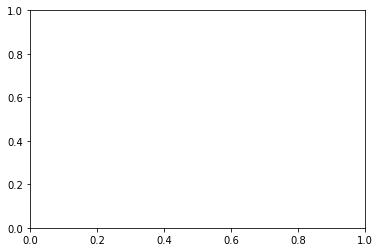

In [62]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

plt.bar(drug_group, number_mice, color='r', alpha=0.5, align="center")

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender= pd.DataFrame(combined.groupby(["Sex"]).count()).reset_index()
gender.head()

gender.plot(kind='pie', y = "Sex")

TypeError: '<' not supported between instances of 'str' and 'int'

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
